# Linear Regression with Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Importing and Exploring Data (USA Housing)

Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!

Your neighbor then gives you some information about a bunch of houses in regions of the United States, it is all in the data set: `USA_Housing.csv`.

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

In [2]:
USAHousing = pd.read_csv('./USA_Housing.csv')

In [3]:
USAHousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
USAHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
USAHousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


### Checking USA Housing Data with Seaborn `pairplot`

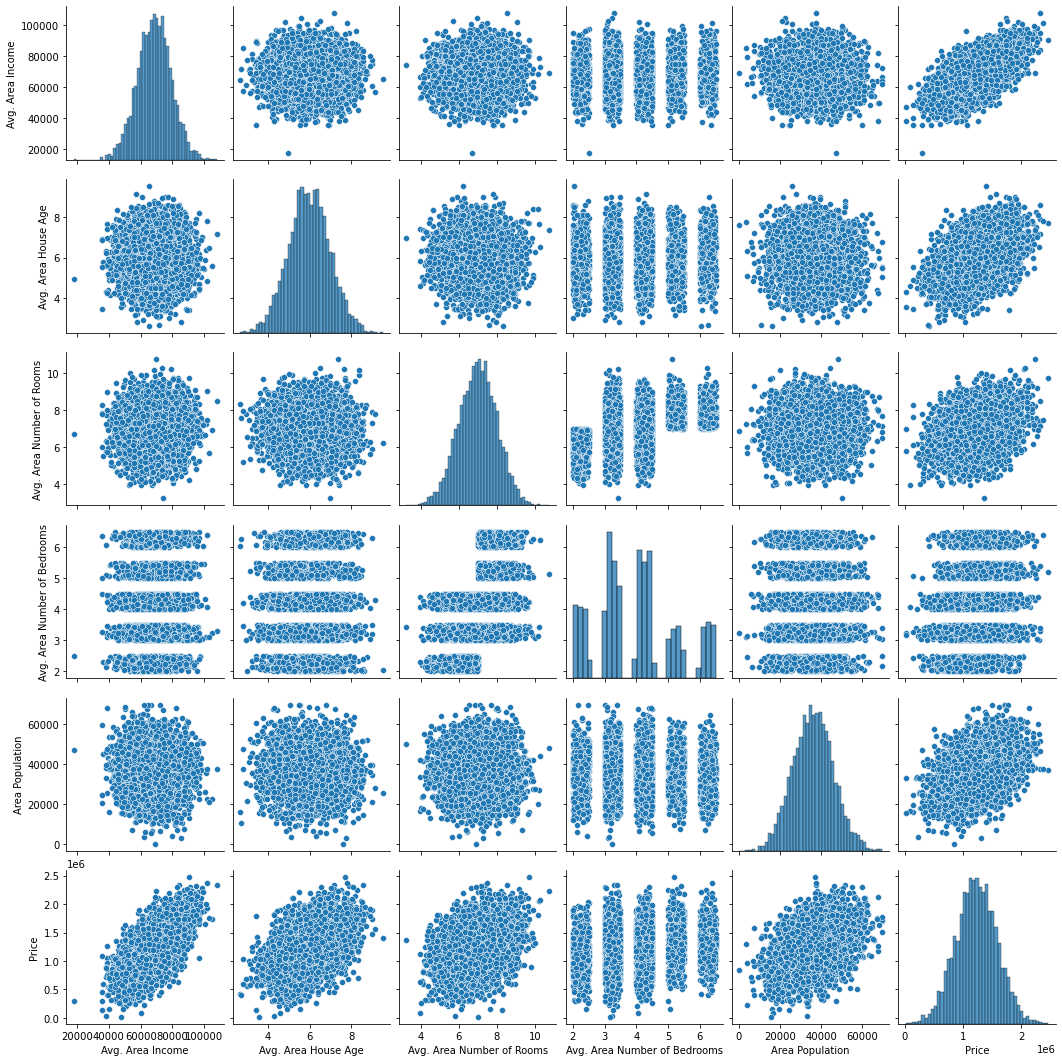

In [6]:
sns.pairplot(USAHousing)

### Plot Price Distribution with Seaborn `displot` and `histplot`

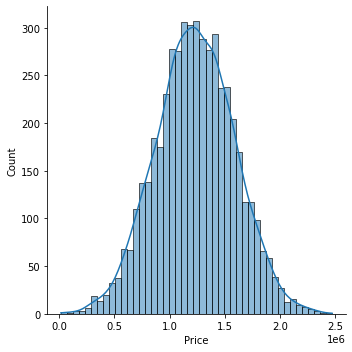

In [7]:
sns.displot(USAHousing['Price'], kde=True)

<AxesSubplot:xlabel='Price', ylabel='Count'>

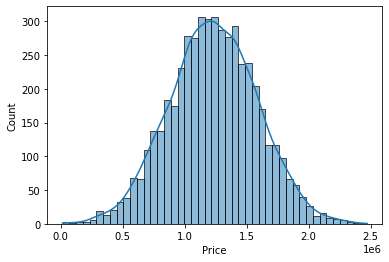

In [8]:
sns.histplot(USAHousing['Price'], kde=True)

### Checking Correlation Between Data Features Using Heatmaps

In [9]:
# Compute pairwise correlation of columns
USAHousing.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<AxesSubplot:>

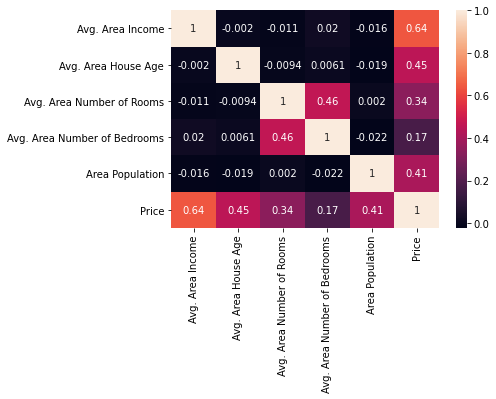

In [10]:
# Plot rectangular data as a color-encoded matrix
# annot=True: to show the actual correlation value in the chart
sns.heatmap(USAHousing.corr(), annot=True)

## Building a Linear Regression Model to Predict House Prices

#### Preparing training and test data sets

In [11]:
# Get the list of column names again
USAHousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [12]:
# Define X as data features
X = USAHousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [13]:
# Define y as target values - what the model is trying to predict
y = USAHousing['Price']

In [14]:
# Import utility functions from ScikitLearn
from sklearn.model_selection import train_test_split

In [15]:
# Split data (features and target values) into train and test data sets
# test_size=0.4 -> 40% of the data (X, y) is assigned to the test data set
#                  60% of the data (X, y) is assigned to the training data set
# random_state=101 -> to specify that the random of the machine learning algorithm
#                     should be kept the same if the value is fix (like 101 in this case)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

#### Creating a linear regression machine learning model

In [16]:
# Import linear regression model from ScikitLean
from sklearn.linear_model import LinearRegression

In [17]:
# Define a linear regression object
lm = LinearRegression()

In [18]:
# Train the model by calling fit() method passing in training data
# This will fit the model with the training data
lm.fit(X_train, y_train)

LinearRegression()

#### Evaluating linear regression model

In [19]:
print(lm.intercept_)

-2640159.7968519107


In [20]:
# Check coefficient - relates to each feature in our dataset
# .coef_ will return coefficient for each feature
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [21]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


<font color=magenta>
Coefficient Interpretation:  

- If we hold all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an increase of **\$21.528276** in **Price**.
- If we hold all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an increase of **\$164883.282027** in **Price**.
</font>

#### Using the trained linear regression model to predict new values

In [22]:
# Pass in the X_test (feature data that have never used to train model)
predictions = lm.predict(X_test)
predictions

array([1260960.70567626,  827588.75560352, 1742421.24254328, ...,
        372191.40626952, 1365217.15140895, 1914519.54178824])

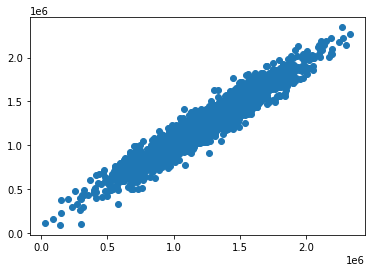

In [23]:
# Plot out a scatter chart showing how different the target values
# and predicted values are
plt.scatter(y_test, predictions)

<font color=magenta>When the set of dots in the above scatter chart form a straight line, we can infer that our linear regression model was trained and reached to a pretty good state.</font>

##### Residual Histogram

<AxesSubplot:xlabel='Price', ylabel='Count'>

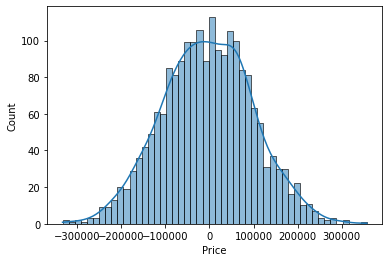

In [24]:
sns.histplot(y_test - predictions, bins=50, kde=True)

<font color=magenta>From the above residual histogram, we can see that the distribution of the differences between target values (`y_test`) and predicted values (`predictions`) look normal, it is a good sign indicating that our choice of using a `linear regression` model is correct.</font>

## Regression Evaluation Metrics

Here are three common evaluation metrics for regression problems:

**[Mean Absolute Error (MAE)](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error)** is the mean of the absolute value of the errors:

$$
\frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

**[Mean Squared Error (MSE)](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)** is the mean of the squared errors:

$$
\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

**Root Mean Squared Error** (RMSE) is the squared root of the mean of the squared errors:

$$
\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

in which:

- $y_i$: true values
- $\hat{y}_i$: predicted values
- $n$: total number of data points

Comparing these metrics:

- **MAE** is the easiest to understad, because it's the average error.
- **MSE** is more popular than MAE, because MSE *punishes* larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the $y$ units.

All of these are **loss functions**, because we want to minimize them.

In [25]:
from sklearn import metrics

In [26]:
errors_df = pd.DataFrame({
    'MAE': [metrics.mean_absolute_error(y_test, predictions)],
    'MSE': [metrics.mean_squared_error(y_test, predictions)],
    'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, predictions))]
})
errors_df

,MAE,MSE,RMSE
0,82288.222519,1.046096e+10,102278.829223


## Using ScikitLean's Preprepared Datasets for Linear Regression Analysis

ScikitLearn's [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) consists of `20,640` samples and `9` features. We will use this dataset to do the same linear regression analysis.

In [27]:
# Load data
from sklearn.datasets import fetch_california_housing
CA_housing = fetch_california_housing(as_frame=True)
CA_housing

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [28]:
# Get the loaded data in a Pandas DataFrame format
CA_housing_df = CA_housing.frame
CA_housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [29]:
# Print out the description of the data just downloaded
print(CA_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

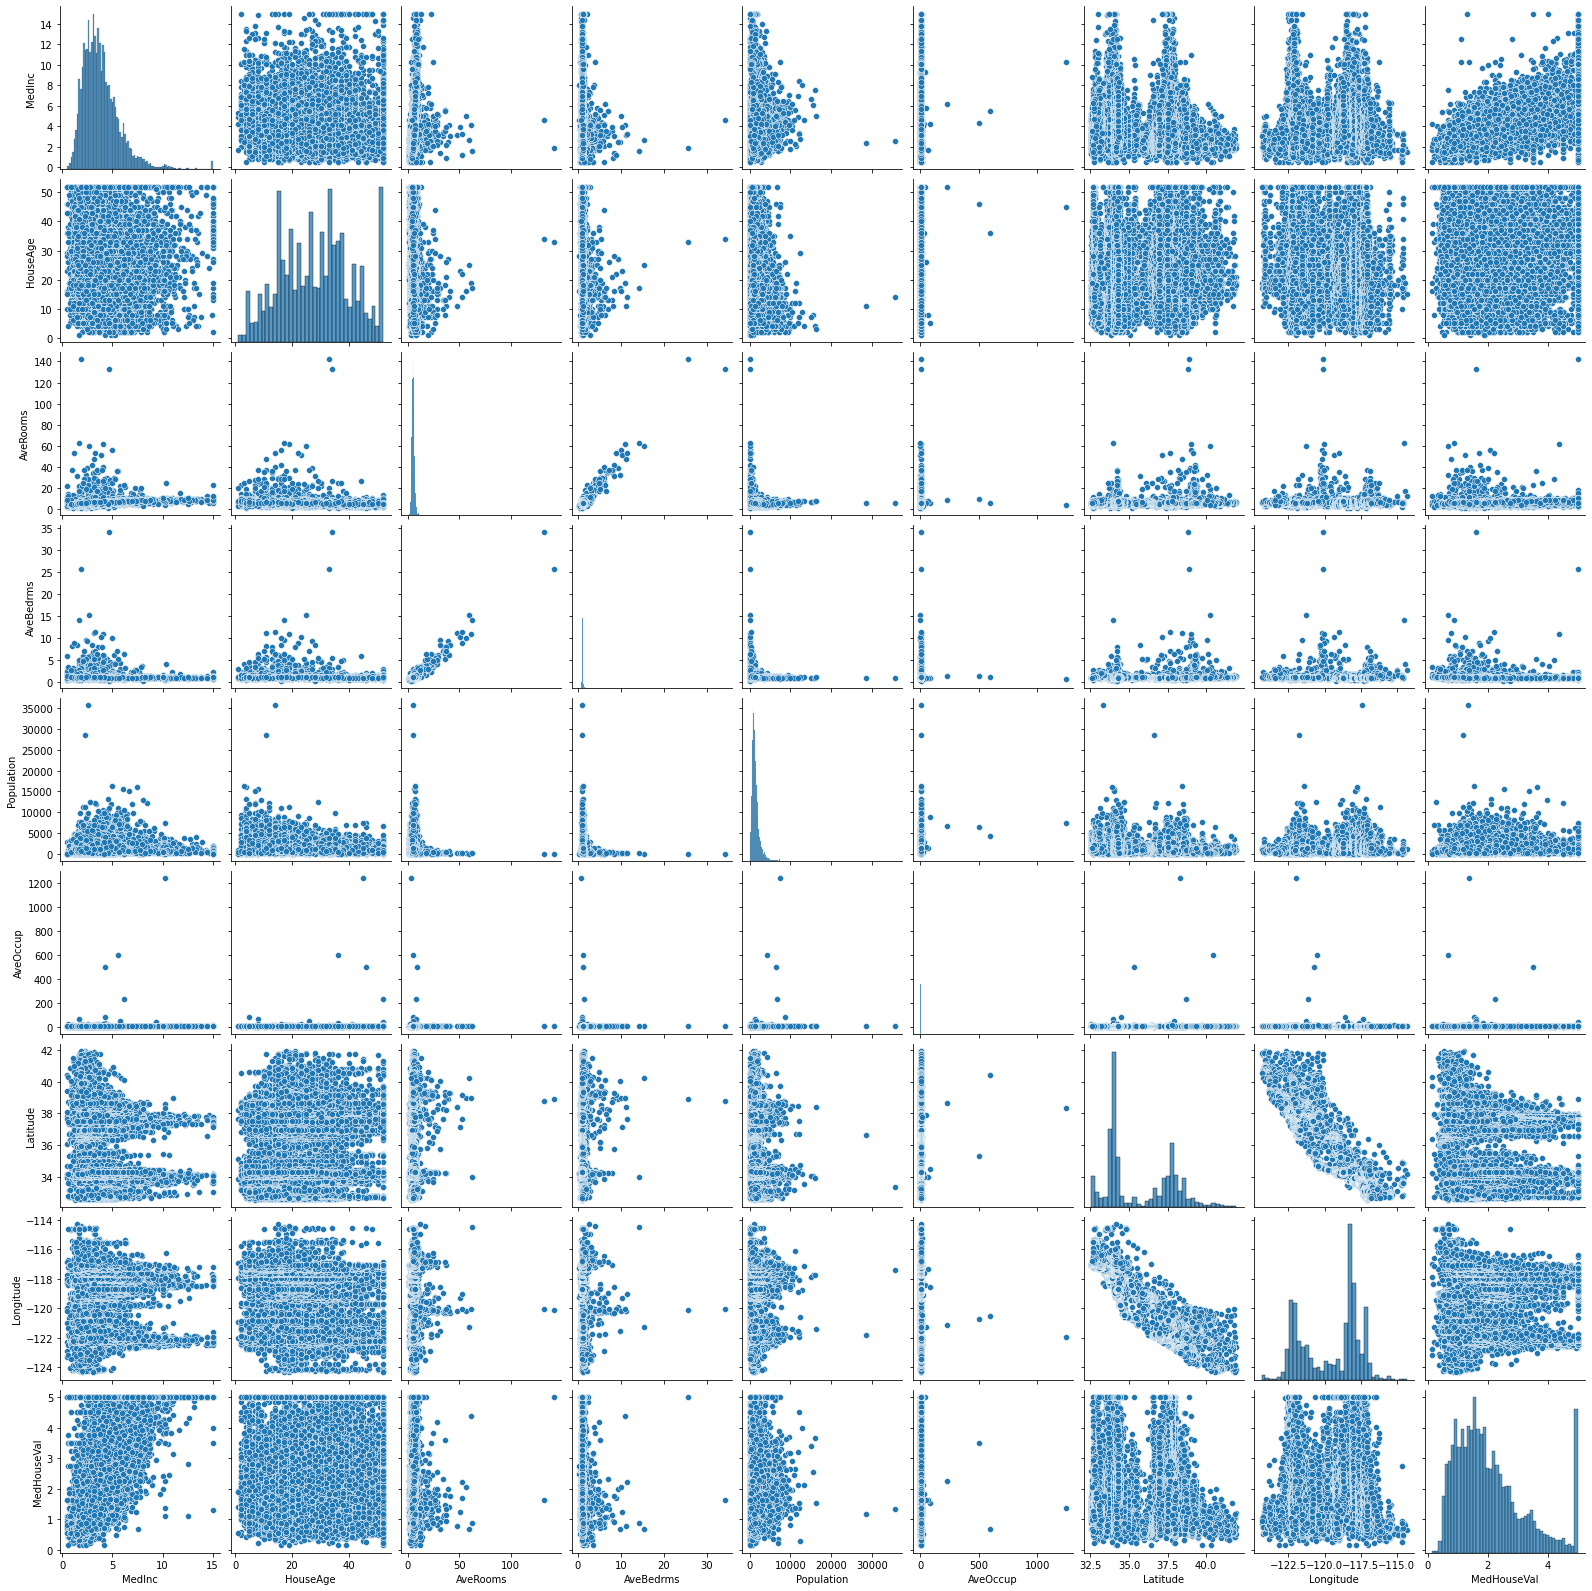

In [30]:
# Show a pair plot of the data features
sns.pairplot(CA_housing_df)

In [31]:
# Confirm some of the basic statistics of the data
CA_housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [32]:
# Show correlation between data features
CA_housing_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot:>

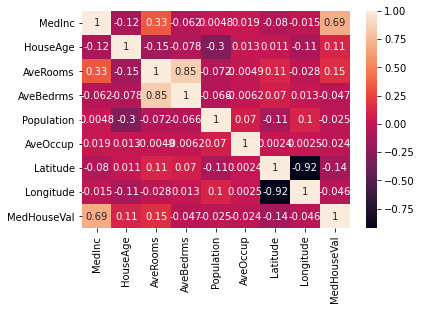

In [33]:
sns.heatmap(CA_housing_df.corr(), annot=True)

In [34]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    CA_housing['data'], # X
    CA_housing['target'], # y
    test_size=0.3,
    random_state=42
)

In [35]:
# Create and train a linear regression model
ca_housing_price_linear_regression_model = LinearRegression()
ca_housing_price_linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [36]:
# Print the intercept of the trained model
ca_housing_price_linear_regression_model.intercept_

-37.05624133152514

In [37]:
# Show coefficient
ca_housing_coefficient_df = pd.DataFrame(
    ca_housing_price_linear_regression_model.coef_,
    CA_housing['feature_names'], # Use feature names as row index
    columns=['Coefficient']
)
ca_housing_coefficient_df

,Coefficient
MedInc,4.458226e-01
HouseAge,9.681868e-03
AveRooms,-1.220951e-01
AveBedrms,7.785996e-01
Population,-7.757404e-07
AveOccup,-3.370027e-03
Latitude,-4.185367e-01
Longitude,-4.336880e-01


In [38]:
# Predict target values for test data
ca_housing_price_predictions = ca_housing_price_linear_regression_model.predict(X_test)
ca_housing_price_predictions

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

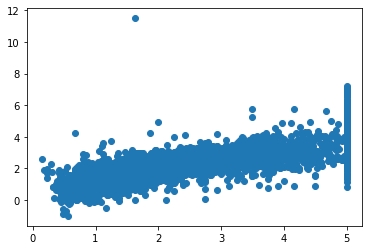

In [39]:
plt.scatter(y_test, ca_housing_price_predictions)

<AxesSubplot:xlabel='MedHouseVal'>

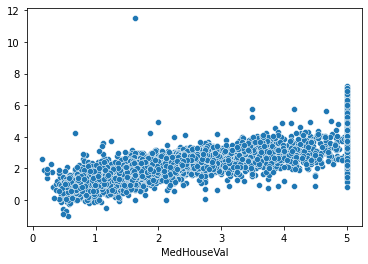

In [40]:
sns.scatterplot(x=y_test, y=ca_housing_price_predictions)

<AxesSubplot:xlabel='MedHouseVal', ylabel='Count'>

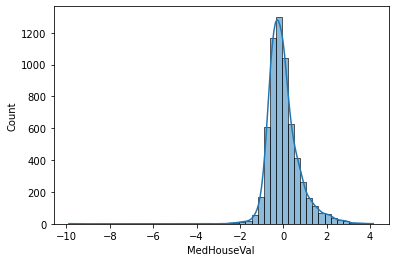

In [41]:
sns.histplot(y_test - ca_housing_price_predictions, bins=50, kde=True)

In [42]:
ca_housing_errors_df = pd.DataFrame({
    'MAE': [metrics.mean_absolute_error(y_test, ca_housing_price_predictions)],
    'MSE': [metrics.mean_squared_error(y_test, ca_housing_price_predictions)],
    'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, ca_housing_price_predictions))]
})
ca_housing_errors_df

,MAE,MSE,RMSE
0,0.527247,0.530568,0.728401
